<a href="https://colab.research.google.com/github/theamitmehra/Oasis-Infobyte-projects/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading dataset

In [18]:
df = pd.read_csv('/content/Iris.csv')

df.head()

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
df.rename(columns={"Species": "species"}, inplace=True)
print(df.head())

## Basic information and statistics

In [ ]:
print(df.info())
print(df.describe())

## Checking for missing values

In [21]:
print("\nMissing Values:\n", iris.isna().sum())


Missing Values:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
species          0
dtype: int64


## check the distribution of data

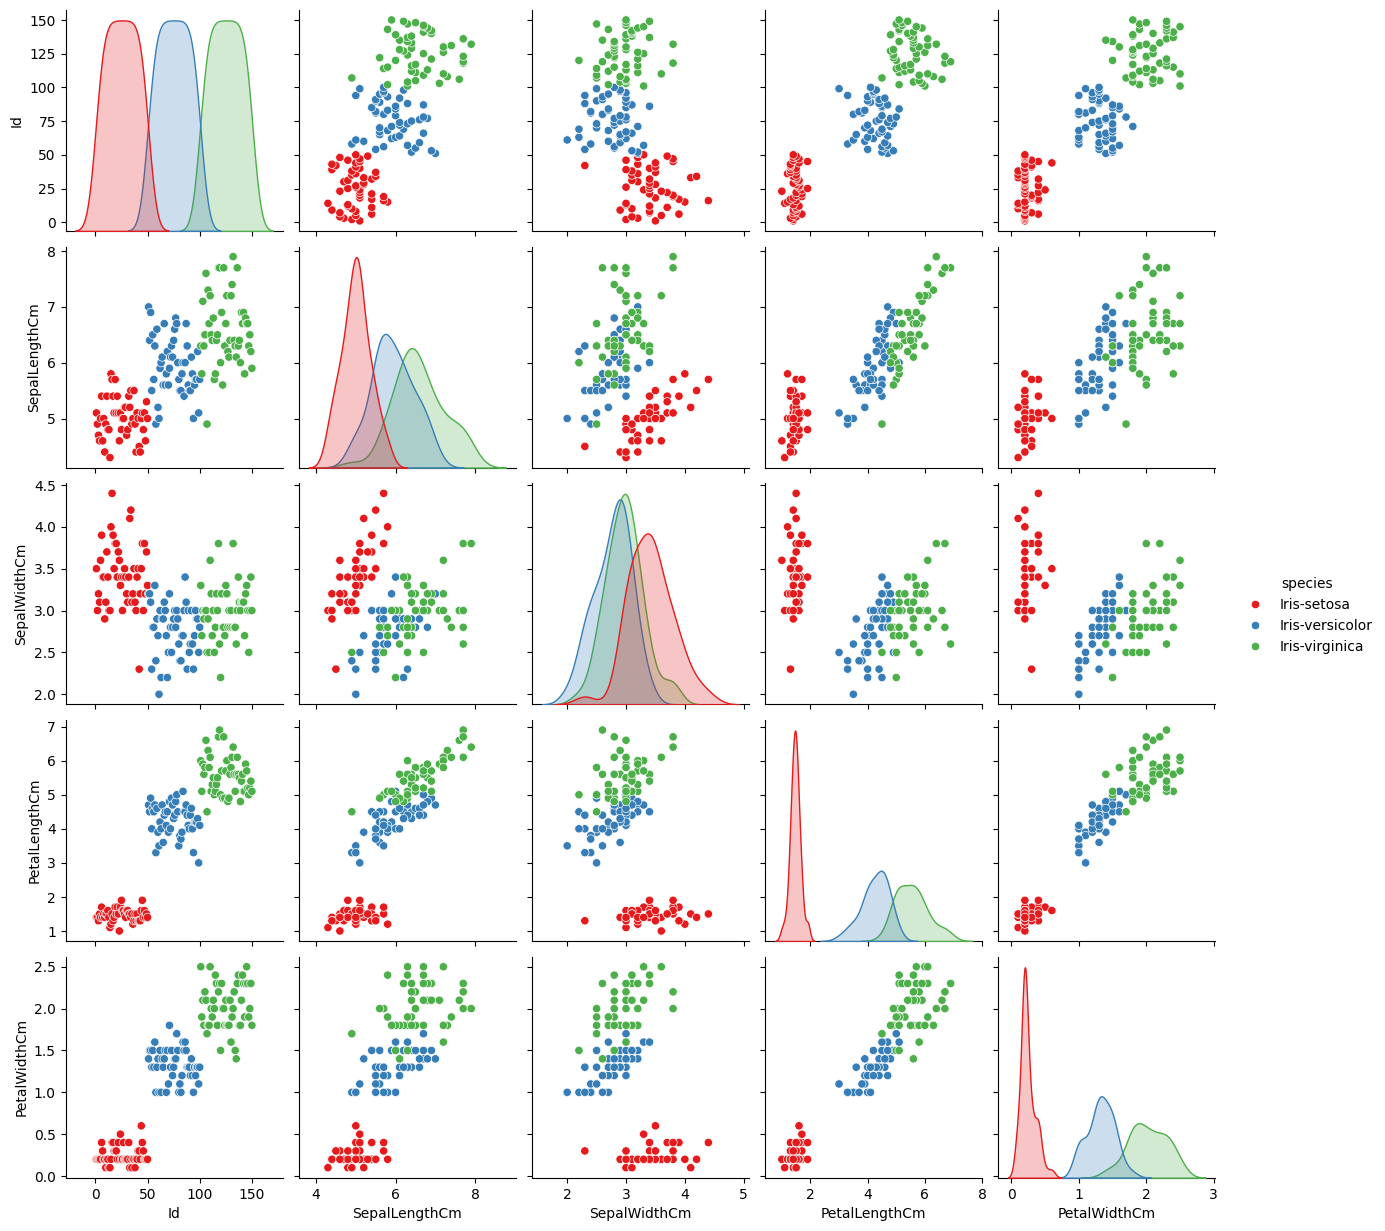

In [19]:
sns.pairplot(df, hue='species', palette='Set1')
plt.show()

## Checking correlation matrix of dataset

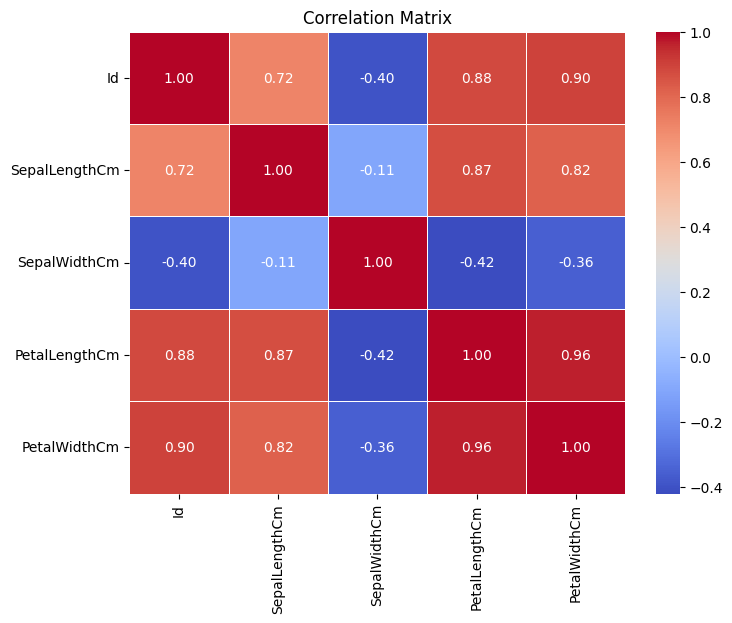

In [31]:
correlation_matrix = df.drop(columns=["species"]).corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Feature distribution plots

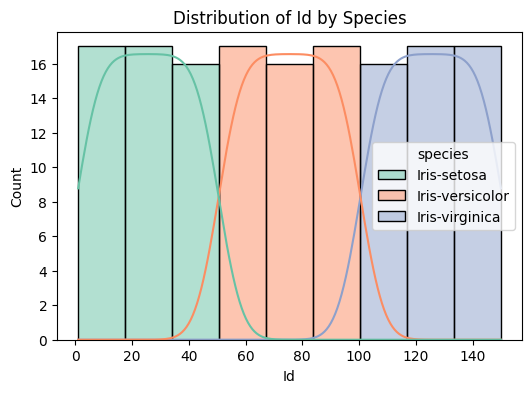

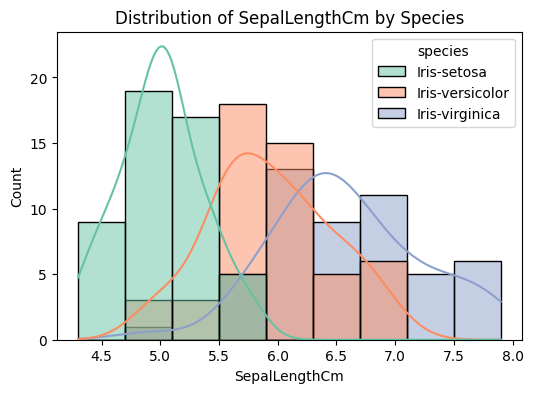

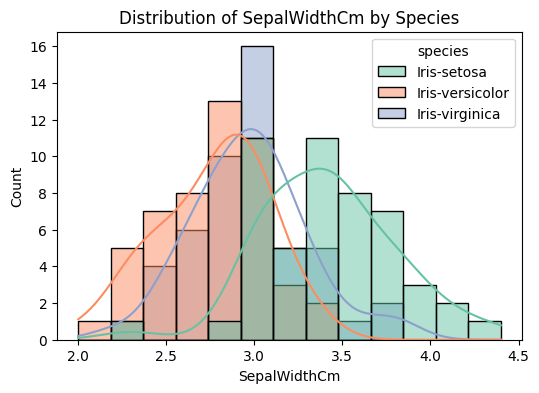

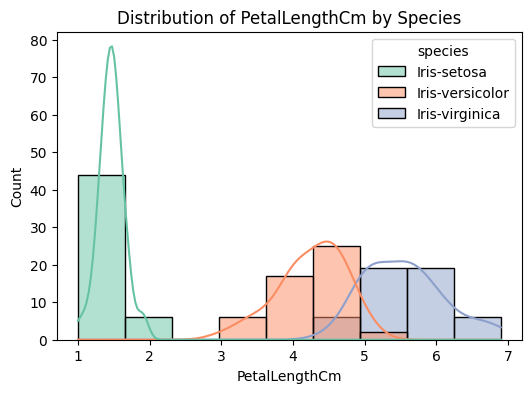

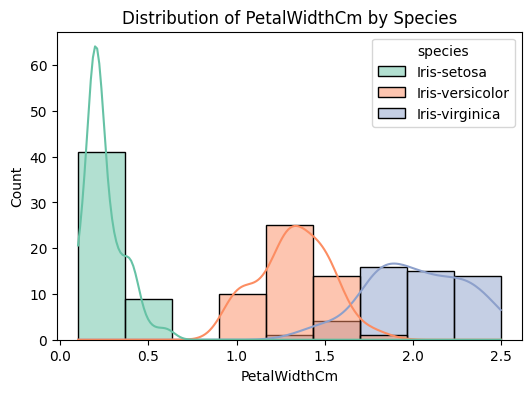

In [32]:
features = df.columns[:-1]
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='species', kde=True, palette='Set2')
    plt.title(f"Distribution of {feature} by Species")
    plt.show()

## Data preprocessing

In [27]:
# Import necessary libraries for model building
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['species'])  # All columns except 'species'
y = df['species']  # Target variable is 'species'

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm the split sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 120
Test set size: 30


In [ ]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Initialize the models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}





Logistic Regression trained successfully!

Random Forest trained successfully!

K-Nearest Neighbors trained successfully!


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Train each model and store results
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"\n{name} trained successfully!")

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression Performance:
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Random Forest Performance:
Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Co

## Saving the model

In [33]:
import joblib

model = models["Random Forest"]

joblib.dump(model, 'iris_rf_model.pkl')
print("\nBest model saved as iris_rf_model.pkl")


Best model saved as iris_rf_model.pkl
